In [1]:
import pandas as pd
import numpy as np

cust_360 = pd.read_csv("C:/Users/pktal/merged_customer_360.csv")
cust_360.head()

,customer_id,age,gender,income,occupation,city,tenure_years,avg_balance,monthly_deposits,monthly_withdrawals,...,fd_amount,insurance_policy,shopping_spend,travel_spend,utility_spend,wallet_spend,total_spend_6m,has_credit_card,has_loan,has_investments
0,1,59,Male,800000,Salaried,Danieltown,15,92515.92,1,9,...,0.0,0.0,38258,39447,14452,19085,111242,1,0,0
1,2,63,Female,800000,Self-Employed,Littleberg,7,138097.40,13,16,...,100000.0,1.0,58169,37562,15177,15296,126204,1,1,1
2,3,39,Male,200000,Self-Employed,Markview,11,124329.40,14,8,...,0.0,0.0,54844,38570,18502,17953,129869,1,1,0
3,4,44,Male,350000,Salaried,Lake Robertstad,8,156819.94,4,19,...,0.0,0.0,34021,36571,14068,27019,111679,0,0,0
4,5,44,Female,800000,Salaried,Delgadoburgh,2,93515.51,9,13,...,100000.0,1.0,52034,38914,11058,16331,118337,1,1,1


In [2]:
# Spend to Income Ratio

cust_360["spend_to_income"] = cust_360["total_spend_6m"] / (cust_360["income"] + 1)

In [3]:
# EMI Burden Ratio

cust_360["emi_to_income"] = cust_360["monthly_emi"] / (cust_360["income"] / 12 + 1)

In [4]:
# Credit Utilization Buckets

cust_360["high_credit_util"] = np.where(cust_360["utilization_ratio"] > 0.7, 1, 0)

In [5]:
# Digital Engagement Score

cust_360["digital_engagement_score"] = (
    cust_360["digital_txn_ratio"] * 0.6 +
    (cust_360["monthly_deposits"] / 15) * 0.4
)

In [6]:
# Activity Intensity

cust_360["txn_activity_score"] = (
    cust_360["monthly_deposits"] +
    cust_360["monthly_withdrawals"]
)

In [7]:
# Wealth Indicators
# A. Total Invested Amount

cust_360["total_investments"] = cust_360["mf_investment"] + cust_360["fd_amount"]

In [8]:
# B. Wealth Tier (Categorical)

cust_360["wealth_tier"] = pd.cut(
    cust_360["total_investments"],
    bins=[-1, 50000, 200000, 1000000],
    labels=["Low", "Medium", "High"]
)

In [9]:
# Risk Proxy Indicators
# A. Risk Flag

cust_360["risk_flag"] = np.where(
    (cust_360["delinquency_12m"] == 1) | (cust_360["overdue_flag"] == 1),
    1, 0
)

In [10]:
# B. Simple Risk Score

cust_360["risk_score"] = (
    cust_360["high_credit_util"] * 2 +
    cust_360["delinquency_12m"] * 3 +
    cust_360["overdue_flag"] * 3
)

In [11]:
# Product Holding Count

cust_360["product_count"] = (
    cust_360["has_credit_card"] +
    cust_360["has_loan"] +
    cust_360["has_investments"]
)

In [12]:
# Selecting Features

features = [
    "age","income","tenure_years",
    "avg_balance","digital_engagement_score",
    "spend_to_income","emi_to_income",
    "utilization_ratio","txn_activity_score",
    "total_investments","risk_score",
    "product_count"
]


In [13]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cust_360[features])

scaled_df = pd.DataFrame(scaled_features, columns=features)

In [14]:
cust_360.to_csv("C:/Users/pktal/feature_engineered_360.csv", index=False)
scaled_df.to_csv("C:/Users/pktal/final_model_input.csv", index=False)

import joblib
joblib.dump(scaler, "C:/Users/pktal/scaler.pkl")

print("Feature engineered datasets saved successfully.")

Feature engineered datasets saved successfully.


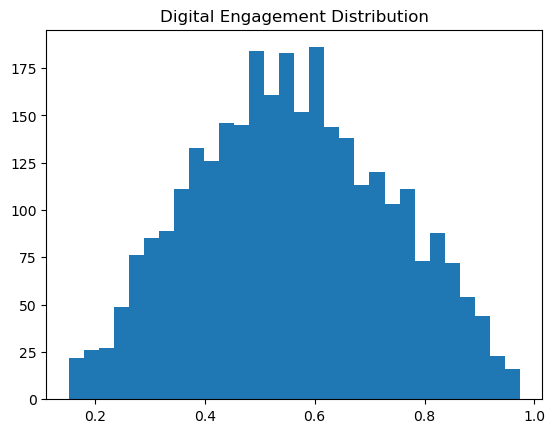

In [15]:
import matplotlib.pyplot as plt

plt.hist(cust_360["digital_engagement_score"], bins=30)
plt.title("Digital Engagement Distribution")
plt.show()